# Chatbot Data Exploratory Data Analysis

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
# 데이터가 없다면 아래 셀 활성화 후 실행
# urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename="ChatBotData.csv")

## EDA

데이터에 대한 분석과 전처리를 진행한 후 전처리 데이터로 모델링을 하는 것이 관례였다면, 여기서는 데이터 분석을 우선적으로 진행한 후 데이터 전처리와 모델을 한 번에 만들어 볼 계획.

데이터 분석을 통해 나온 결과를 활용해 전처리 모듈 생성

In [4]:
DATA_IN_PATH = './data_in/'

data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### 라벨 의미 (0: 일상 대화, 1: 부정(이별), 2: 긍정(사랑))
(깃헙에서 데이터 명세 참고 https://github.com/songys/Chatbot_data)

### 문장 전체에 대한 분석

In [5]:
# 데이터의 길이 분석
sentences = list(data['Q'] + data['A'])
sentences[:10]

['12시 땡!하루가 또 가네요.',
 '1지망 학교 떨어졌어위로해 드립니다.',
 '3박4일 놀러가고 싶다여행은 언제나 좋죠.',
 '3박4일 정도 놀러가고 싶다여행은 언제나 좋죠.',
 'PPL 심하네눈살이 찌푸려지죠.',
 'SD카드 망가졌어다시 새로 사는 게 마음 편해요.',
 'SD카드 안돼다시 새로 사는 게 마음 편해요.',
 'SNS 맞팔 왜 안하지ㅠㅠ잘 모르고 있을 수도 있어요.',
 'SNS 시간낭비인 거 아는데 매일 하는 중시간을 정하고 해보세요.',
 'SNS 시간낭비인데 자꾸 보게됨시간을 정하고 해보세요.']

- 문자 단위 길이 분석
- 단어 단위 길이 분석
- 형태소 단위 길이 분석

전처리 할 부분이 많음..

In [6]:
from konlpy.tag import Twitter, Okt

In [7]:
okt = Okt()

In [8]:
# okt.pos('JAVAHOME 설정 완료!!')

### Tokenization

In [9]:
# 어절 토큰화
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

print(tokenized_sentences[:10])
print(sent_len_by_token[:10])
print(sent_len_by_eumjeol[:10])

[['12시', '땡!하루가', '또', '가네요.'], ['1지망', '학교', '떨어졌어위로해', '드립니다.'], ['3박4일', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['3박4일', '정도', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['PPL', '심하네눈살이', '찌푸려지죠.'], ['SD카드', '망가졌어다시', '새로', '사는', '게', '마음', '편해요.'], ['SD카드', '안돼다시', '새로', '사는', '게', '마음', '편해요.'], ['SNS', '맞팔', '왜', '안하지ㅠㅠ잘', '모르고', '있을', '수도', '있어요.'], ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중시간을', '정하고', '해보세요.'], ['SNS', '시간낭비인데', '자꾸', '보게됨시간을', '정하고', '해보세요.']]
[4, 4, 5, 6, 3, 7, 7, 8, 9, 6]
[13, 17, 19, 21, 15, 21, 19, 23, 28, 25]


In [10]:
# 형태소 토큰화
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]
sent_len_by_morph

[8,
 7,
 5,
 5,
 6,
 8,
 9,
 9,
 15,
 13,
 12,
 7,
 9,
 9,
 8,
 8,
 10,
 10,
 11,
 13,
 8,
 10,
 24,
 16,
 14,
 17,
 22,
 22,
 11,
 7,
 13,
 13,
 17,
 9,
 10,
 24,
 8,
 10,
 10,
 11,
 12,
 8,
 8,
 12,
 11,
 6,
 6,
 4,
 5,
 7,
 6,
 7,
 9,
 8,
 10,
 5,
 8,
 8,
 7,
 13,
 9,
 8,
 11,
 11,
 6,
 7,
 13,
 14,
 7,
 10,
 8,
 7,
 9,
 10,
 10,
 15,
 9,
 8,
 10,
 16,
 6,
 7,
 7,
 6,
 6,
 8,
 5,
 9,
 8,
 8,
 8,
 13,
 12,
 9,
 6,
 10,
 8,
 10,
 13,
 16,
 8,
 7,
 11,
 9,
 9,
 10,
 11,
 6,
 10,
 7,
 8,
 9,
 12,
 11,
 8,
 15,
 5,
 6,
 6,
 6,
 7,
 9,
 7,
 4,
 11,
 9,
 16,
 11,
 6,
 6,
 8,
 5,
 14,
 9,
 12,
 11,
 5,
 7,
 10,
 10,
 8,
 15,
 14,
 12,
 15,
 5,
 4,
 10,
 9,
 12,
 12,
 9,
 11,
 9,
 14,
 10,
 12,
 6,
 9,
 10,
 13,
 14,
 7,
 8,
 11,
 4,
 9,
 9,
 10,
 10,
 4,
 6,
 11,
 8,
 8,
 20,
 14,
 13,
 7,
 9,
 11,
 9,
 6,
 7,
 6,
 10,
 11,
 6,
 7,
 16,
 14,
 13,
 10,
 12,
 7,
 7,
 8,
 11,
 9,
 8,
 10,
 7,
 10,
 7,
 8,
 7,
 7,
 5,
 6,
 9,
 10,
 9,
 12,
 9,
 9,
 7,
 8,
 10,
 10,
 8,
 10,
 13,
 9,
 8,
 8,
 8,

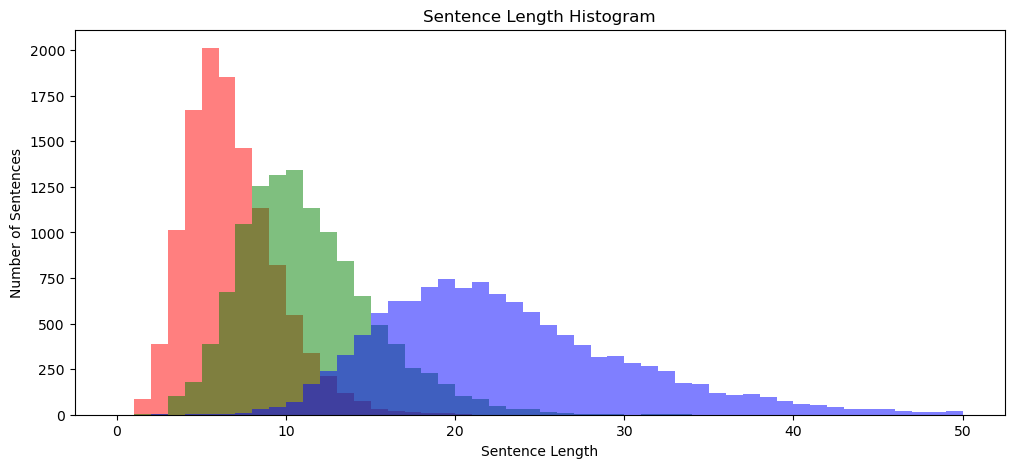

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')

plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

- 어절 토큰화 길이: 짧음
- 형태소 토큰화 길이: 중간
- 음절 단위 토큰화: 길다

어떠한 토큰화에서도 같은 결과임

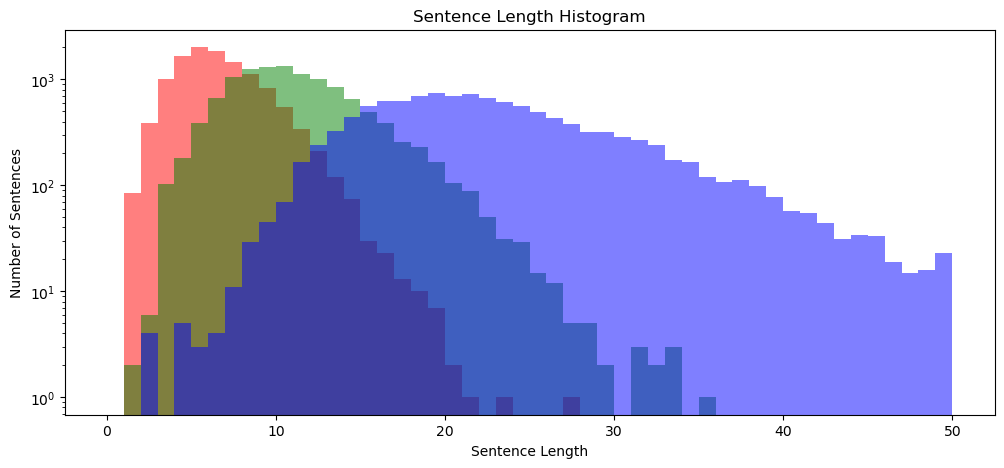

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')

plt.yscale('log')  # 이상치 확인용 로그 스케일 변환
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

어절의 경우 길이 20 이상, 형태소는 30 이상, 음절은 비슷한 수준에서 이상치가 존재

각 길이값을 통해 정확한 수치 확인

In [13]:
import numpy as np

print('어절 최대 길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 STD: {}'.format(np.std(sent_len_by_token)))
print('어절 MEDIAN: {}'.format(np.median(sent_len_by_token)))

어절 최대 길이: 27
어절 최소 길이: 1
어절 평균 길이: 6.28
어절 길이 STD: 2.6714891772526705
어절 MEDIAN: 6.0


### 질문 답변 각각에 대한 문장 길이 분포 체크

In [14]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Num of Queries')

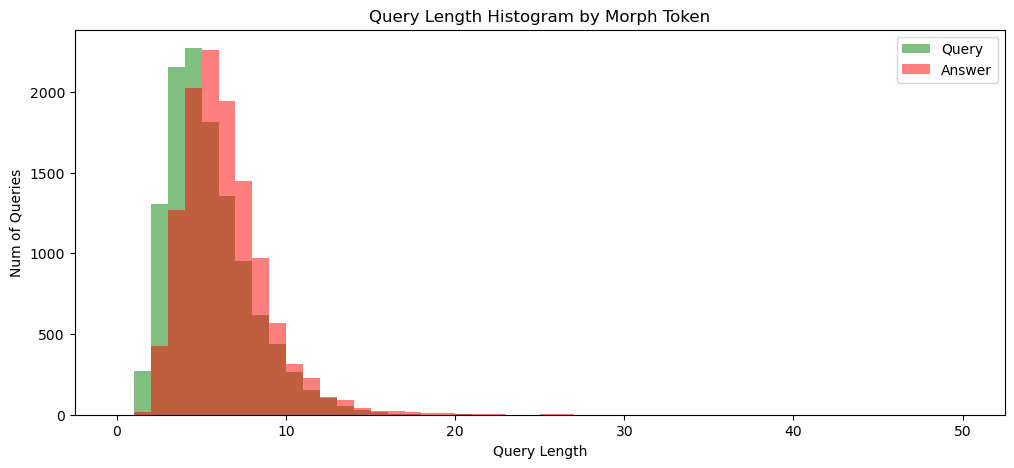

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', alpha=0.5, label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Num of Queries')

Text(0, 0.5, 'Num of Queries')

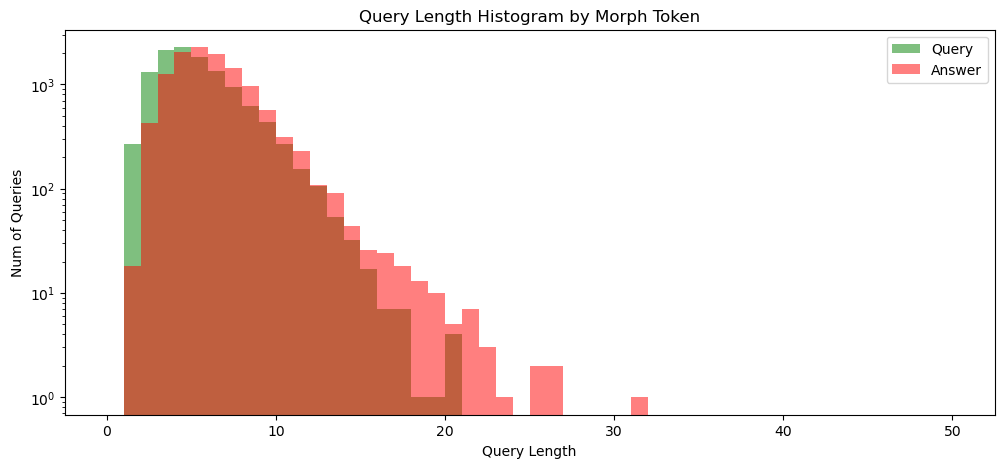

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', alpha=0.5, label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.yscale('log')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Num of Queries')

Query가 Answer보다 짧다는 것을 확인할 수 있음

하지만 동시에 답변 데이터가 이상치가 더 많다는 것도 확인할 수 있다.

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4c81e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4c703d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c4c81cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c4c70910>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c4c70bb0>,
 'means': []}

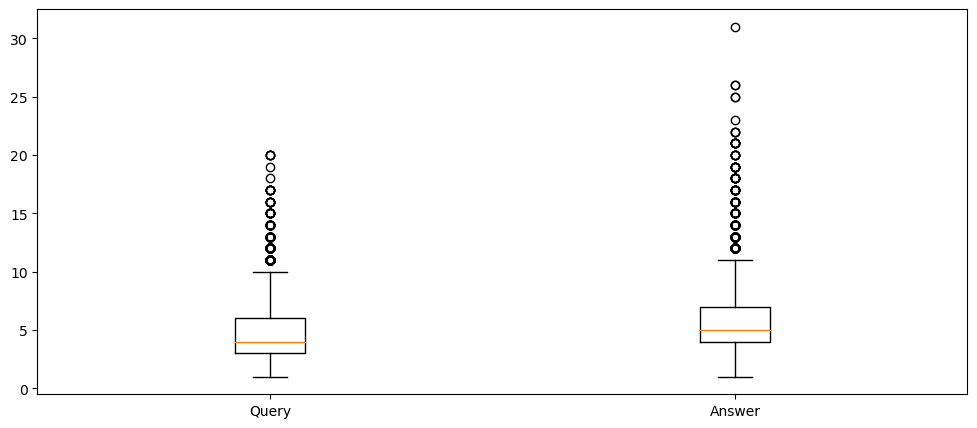

In [17]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels=['Query', 'Answer'])

위 길이값을 통해 모델에 적용할 문장의 최대 길이를 결정 -> 평균이나 3사분위값 설정 가능 하나, 디코더의 경우 문장 뒷부분이 일부 잘려서 생성하고자 하는 문장이 완전한 문장이 아닌 문제가 있을 수 있다는 것을 파악 -> 여러 시도 끝에 25로 설정

### 데이터 어휘 빈도 분석

이제 길이에 대한 부분은 그만 보고, 사용되는 단어에 대해 분석.
- 어떤 단어가 사용되는지
- 자주 사용되는 단어는 어떤 것이 있는지

In [18]:
'오늘 밤 은 유난히 덥구나'.replace(' ', '')

'오늘밤은유난히덥구나'

In [19]:
# Noun, Adjective, Verb만 활용
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')): # 공백 제거
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

In [20]:
from wordcloud import WordCloud, STOPWORDS
import os
os.getcwd()

'/Users/ben/ML/nlp/transformer'

In [21]:
font_path = './AppleGothic.ttf'

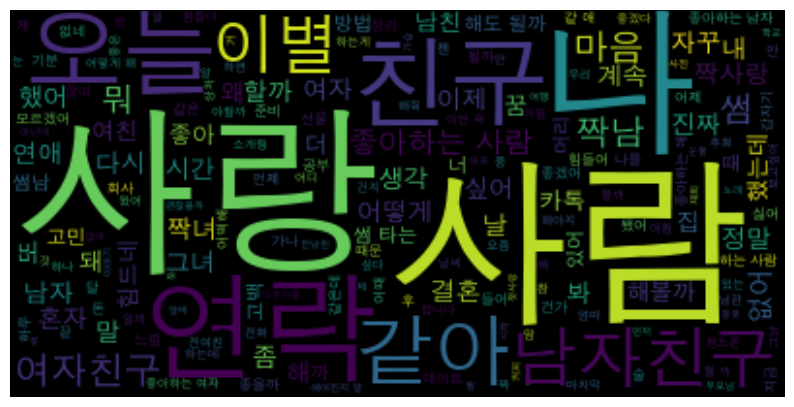

In [22]:
plt.figure(figsize=(10, 6))

query_wordcloud = WordCloud(font_path=font_path).generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

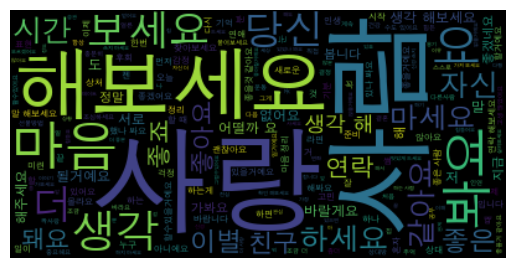

In [23]:
answer_wordcloud = WordCloud(font_path=font_path).generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
answer_NVA_token_sentences

'하루 또 가네요 위로 해드립니다 여행 좋죠 여행 좋죠 눈살 찌푸려지죠 다시 새로 사는게 마음 편해요 다시 새로 사는게 마음 편해요 모르고있을수도 있어요 시간 정 해보세요 시간 정 해보세요 자랑 하는 자리 요 사람 그럴거예요 사람 그럴거예요 혼자 즐기세요 돈 다시 들어올거예요 땀 식혀주세요 어서 잊고 출발 하세요 집 돌아가서 끄고나오세요 집 돌아가서 끄고나오세요 다음 달 더 절약 해봐요 따뜻하게 사세요 다음 달 더 절약 해봐요 가장 확실한 시간 오늘이 어제 내일 놓고 고민 하느라 시간 낭비하지 마세요 가족 마음 에드 곳 보세요 가족 마음 에드 곳 보세요 가족 마음 에드 곳 보세요 를 들어준 사람 부모님 저 이야기 해주는 사람 친구 생각 있어요 를 들어준 사람 부모님 저 이야기 해주는 사람 친구 생각 있어요 더 가까워질 기회 되겠네요 도 들 바빠서 이야기 할 시간 부족했나 봐요 들 바빠서 이야기 할 시간 부족했나 봐요 가족 마음 에드 곳 보세요 좋은 생각 더 가까워질 기회 되겠네요 를 들어준 사람 부모님 저 이야기 해주는 사람 친구 생각 있어요 좋은 생각 정말 후회 할 습관 무모한 결정 리지 마세요 선생님 기관 연락 해보세요 떨리는 감정 자체 소중해요 득템 했길 바라요 휴식 필요하죠 단 짠으로 개사 게 진리 단 짠으로 개사 게 진리 맛있게 드세요 도 싫어요 가세 가세 맛있게 드세요 맛있게 드세요 병원 가세 이럴 때 쉬는게 중요해요 이럴 때 쉬는게 중요해요 이럴 때 쉬는게 중요해요 따뜻하게 관리 하세요 병원 가세 병원 가세 도 듣고싶네요 자신 더 사랑 해주세요 습관 습관 콕 집어서 물어보세요 좋은 생각 하세요 마음 아픈가요 갑작스러웠나 봐요 관계 변화 왔나 봅니다 처음 당신 매력 어필 해보세요 책임질수있을 때 키워 보세요 먼저 생활 패턴 살펴보세요 먼저 생활 패턴 살펴보세요 책임질수있을 때 키워 보세요 아름다운 곳 안될것도 없죠 혼자 좋아요 연인 살쪄도 알아차리지못하고 알아차려도 싫어하지 않을거예요 즐거운 시간 보내고오세요 질질 끌 마세요 말 해보세요 하면 서로 